In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from mpl_toolkits.mplot3d import Axes3D 

In [112]:
##give path for the data set
df = pd.read_csv("Mall_Customers.csv")

In [113]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [25]:
df.shape

(200, 5)

In [55]:
#checking for null values
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Choosing the Annual Income Column & Spending Score column

In [7]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [114]:
#removing null values (if present)
df.dropna(inplace=True)

In [115]:
df.drop('CustomerID', axis=1, inplace=True)

In [116]:
if "Gender" in df.columns:
    df = pd.get_dummies(df, columns=["Gender"], drop_first=True)

In [91]:
df

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,True
1,21,15,81,True
2,20,16,6,False
3,23,16,77,False
4,31,17,40,False
...,...,...,...,...
195,35,120,79,False
196,45,126,28,False
197,32,126,74,True
198,32,137,18,True


In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Age                     200 non-null    int64
 1   Annual Income (k$)      200 non-null    int64
 2   Spending Score (1-100)  200 non-null    int64
 3   Gender_Male             200 non-null    bool 
dtypes: bool(1), int64(3)
memory usage: 5.0 KB


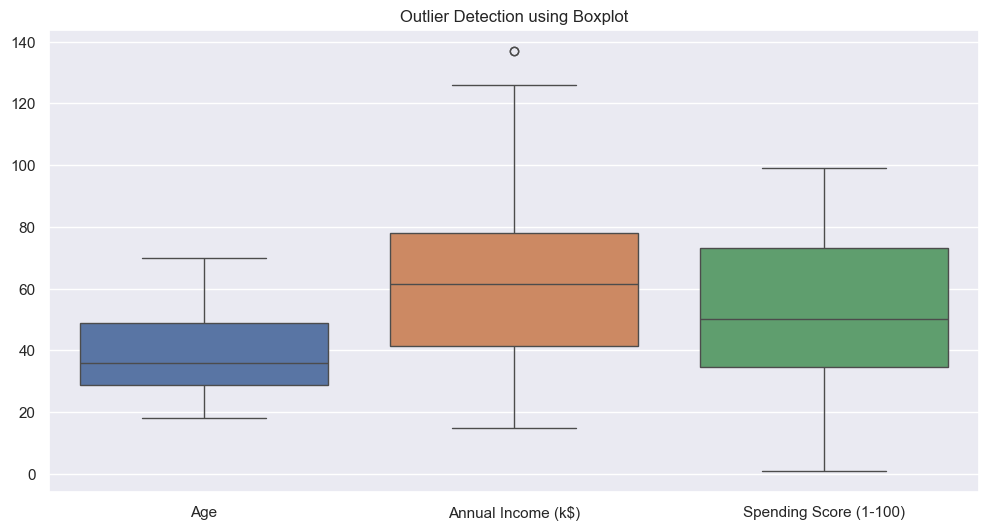

In [117]:
#checking for outliers
features = df.columns[0:3]
plt.figure(figsize=(12,6))
sns.boxplot(data=df[features])
plt.title("Outlier Detection using Boxplot")
plt.show()

In [118]:
#removing outliers (if present)
def remove_outliers(df, col):
    q1 = df[col].quantile(0.25) 
    q3 = df[col].quantile(0.75)
    iqr = q3-q1
    lower = q1 - 1.5*iqr
    upper = q3 + 1.5*iqr
    return df[(df[col]>=lower) & (df[col]<=upper)]


for col in features:
    df = remove_outliers(df, col)

In [119]:
X = df.iloc[:,0:3].values
X

array([[ 19,  15,  39],
       [ 21,  15,  81],
       [ 20,  16,   6],
       [ 23,  16,  77],
       [ 31,  17,  40],
       [ 22,  17,  76],
       [ 35,  18,   6],
       [ 23,  18,  94],
       [ 64,  19,   3],
       [ 30,  19,  72],
       [ 67,  19,  14],
       [ 35,  19,  99],
       [ 58,  20,  15],
       [ 24,  20,  77],
       [ 37,  20,  13],
       [ 22,  20,  79],
       [ 35,  21,  35],
       [ 20,  21,  66],
       [ 52,  23,  29],
       [ 35,  23,  98],
       [ 35,  24,  35],
       [ 25,  24,  73],
       [ 46,  25,   5],
       [ 31,  25,  73],
       [ 54,  28,  14],
       [ 29,  28,  82],
       [ 45,  28,  32],
       [ 35,  28,  61],
       [ 40,  29,  31],
       [ 23,  29,  87],
       [ 60,  30,   4],
       [ 21,  30,  73],
       [ 53,  33,   4],
       [ 18,  33,  92],
       [ 49,  33,  14],
       [ 21,  33,  81],
       [ 42,  34,  17],
       [ 30,  34,  73],
       [ 36,  37,  26],
       [ 20,  37,  75],
       [ 65,  38,  35],
       [ 24,  38

In [120]:
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

In [121]:
print(X_scaled)

[[-1.42541358 -1.77917141 -0.43598941]
 [-1.2823665  -1.77917141  1.19941337]
 [-1.35389004 -1.73944701 -1.72094874]
 [-1.13931942 -1.73944701  1.04366072]
 [-0.5671311  -1.69972262 -0.39705125]
 [-1.21084296 -1.69972262  1.00472256]
 [-0.28103694 -1.65999822 -1.72094874]
 [-1.13931942 -1.65999822  1.70560947]
 [ 1.79314572 -1.62027383 -1.83776323]
 [-0.63865464 -1.62027383  0.84896992]
 [ 2.00771635 -1.62027383 -1.40944345]
 [-0.28103694 -1.62027383  1.90030028]
 [ 1.36400448 -1.58054943 -1.37050529]
 [-1.06779588 -1.58054943  1.04366072]
 [-0.13798986 -1.58054943 -1.44838161]
 [-1.21084296 -1.58054943  1.12153705]
 [-0.28103694 -1.54082504 -0.59174206]
 [-1.35389004 -1.54082504  0.61534095]
 [ 0.93486324 -1.46137625 -0.82537103]
 [-0.28103694 -1.46137625  1.86136212]
 [-0.28103694 -1.42165185 -0.59174206]
 [-0.99627234 -1.42165185  0.88790808]
 [ 0.505722   -1.38192745 -1.75988691]
 [-0.5671311  -1.38192745  0.88790808]
 [ 1.07791032 -1.26275427 -1.40944345]
 [-0.71017818 -1.26275427

Choosing the number of clusters

WCSS -> Within Clusters Sum of Squares

In [122]:
# finding wcss value for different number of clusters

wcss = []

for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', n_init ="auto", random_state=42)
  kmeans.fit(X_scaled)

  wcss.append(kmeans.inertia_)

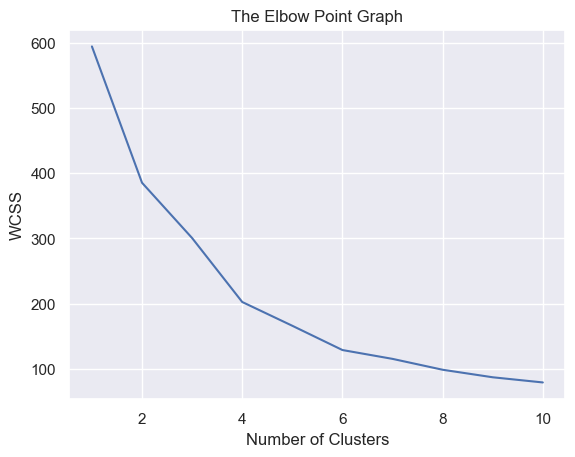

In [124]:
# plot an elbow graph

plt.plot(range(1,11), wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

Optimum Number of Clusters = 5

Training the k-Means Clustering Model

In [134]:
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', n_init = "auto", random_state=42)

# return a label for each data point based on their cluster
Y = kmeans.fit_predict(X_scaled)
df["Cluster"] = Y

print(Y)

[2 2 3 2 2 2 3 2 0 2 0 2 0 2 3 2 3 2 0 2 3 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 3 2 0 2 0 2 0 2 0 3 3 3 0 3 3 0 0 0 0 0 3 0 0 3 0 0 0 3 0 0 3 3 0 0 0 0
 0 3 0 3 3 0 0 3 0 0 3 0 0 3 3 0 0 3 0 3 3 3 0 3 0 3 3 0 0 3 0 3 0 0 0 0 0
 3 3 3 3 3 0 0 0 0 3 3 1 1 3 1 4 1 4 1 4 1 3 1 3 1 4 1 3 1 4 1 3 1 3 1 4 1
 4 1 4 1 4 1 4 1 4 1 4 1 4 1 3 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4
 1 4 1 4 1 4 1 4 1 4 1 4 1]


5 Clusters - 0, 1, 2, 3, 4

Visualizing all the Clusters

In [135]:
sil = silhouette_score(X_scaled, Y)
print(f"\nSilhouette Score (K={optimal_k}): {sil:.3f}")


Silhouette Score (K=5): 0.412


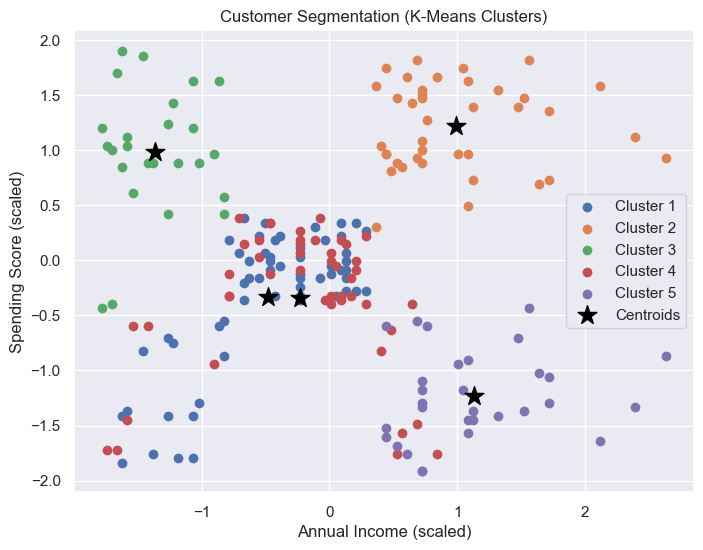

In [136]:
plt.figure(figsize=(8,6))

# Plot each cluster
for c in range(kmeans.n_clusters):
    plt.scatter(
        X_scaled[Y == c, 1],       # X-axis (Feature 1)
        X_scaled[Y == c, 2],       # Y-axis (Feature 2)
        label=f'Cluster {c+1}'
    )

# Plot the centroids
plt.scatter(
    kmeans.cluster_centers_[:, 1],
    kmeans.cluster_centers_[:, 2],
    s=200, c='black', marker='*', label='Centroids'
)

plt.title("Customer Segmentation (K-Means Clusters)")
plt.xlabel("Annual Income (scaled)")
plt.ylabel("Spending Score (scaled)")
plt.legend()
plt.show()


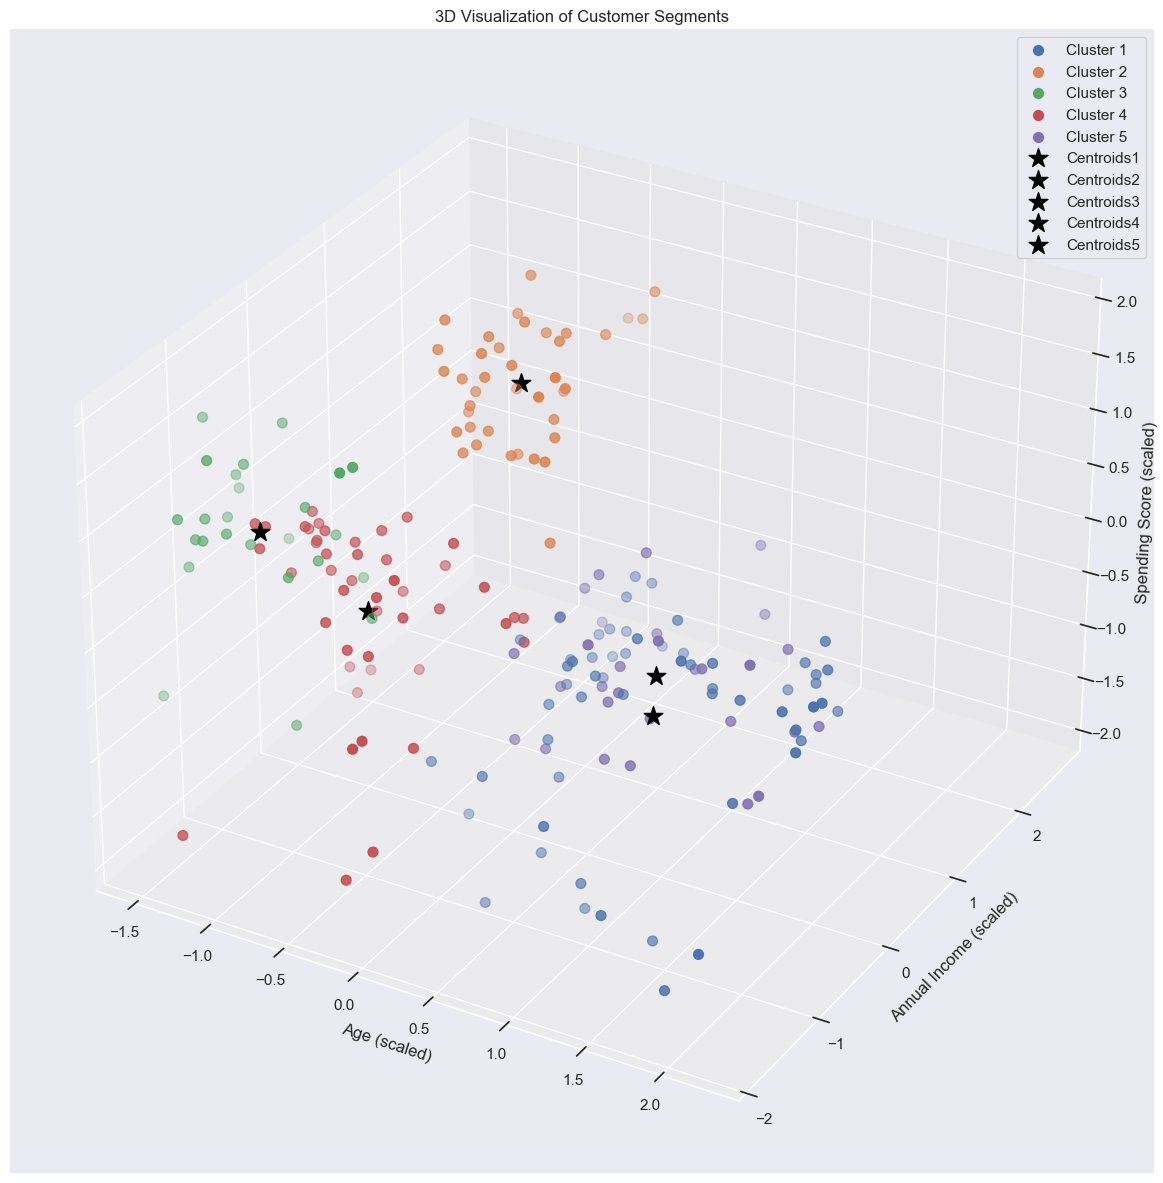

In [137]:
fig = plt.figure(figsize=(15,12))
ax = fig.add_subplot(111, projection="3d")

# Plot each cluster
for c in range(optimal_k):
    ax.scatter(
        X_scaled[Y == c, 0],
        X_scaled[Y == c, 1],
        X_scaled[Y == c, 2],
        s=50,
        label=f"Cluster {c+1}",
    )

# Plot centroids
centers = kmeans.cluster_centers_
for i in range(len(centers)):
    ax.scatter(centers[i,0], centers[i,1], centers[i,2], s=200,c='black', marker="*", label=f"Centroids{i+1}")

ax.set_title("3D Visualization of Customer Segments")
ax.set_xlabel("Age (scaled)")
ax.set_ylabel("Annual Income (scaled)")
ax.set_zlabel("Spending Score (scaled)")
ax.legend()
plt.tight_layout()
plt.show()


In [138]:
centers

array([[ 1.16916449, -0.48333423, -0.33058784],
       [-0.4277519 ,  0.99338768,  1.21838324],
       [-0.96194104, -1.36285974,  0.98291719],
       [-0.86255442, -0.22819284, -0.34541586],
       [ 0.41989375,  1.12865434, -1.23422173]])

In [139]:
centers.shape

(5, 3)

In [140]:
# Cluster Summary
print("\nCluster-wise averages:")
cluster_summary = df.groupby("Cluster")[features].mean().round(2)
print(cluster_summary)
cluster_labels = {
    0: "General Shoppers",                  #Mid income, moderate spenders
    1: "Premium Customers",                 #High income, high spenders
    2: "Potential Growth",                  #Low income, high spenders
    3: "Budget Consious customers",         #Mid income, low spenders
    4: "Upsell Targets"                     #High income, low spenders
}
df["Segment"] = df["Cluster"].map(cluster_labels)
df.head()


Cluster-wise averages:
           Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                   
0        55.28               47.62                   41.71
1        32.95               84.79                   81.49
2        25.48               25.48                   75.44
3        26.87               54.04                   41.33
4        44.80               88.20                   18.50


,Age,Annual Income (k$),Spending Score (1-100),Gender_Male,Cluster,Segment
0,19,15,39,True,2,Potential Growth
1,21,15,81,True,2,Potential Growth
2,20,16,6,False,3,Budget Consious customers
3,23,16,77,False,2,Potential Growth
4,31,17,40,False,2,Potential Growth
